In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, average_precision_score
from sklearn.model_selection import train_test_split

In [2]:
dmv = pd.read_csv('Cyber_Exodus_Data_Final.csv')

In [3]:
dmv.head(5)

,Title,Job_location,Salary_low,Salary_med,Salary_upper,Remote,Hybrid,On_prem,Source,Work_env,...,Mid,Senior,Executive,Experience_level,Salary_s,Commute_S,Per_Crime_S,Prop_Crime_S,Stress,Candidate
0,Information Security Analyst,"Washington, DC",55000.0,67500.0,80000,1,0,0,Indeed,1,...,0,0,0,1,0,0,0,0,0,0
1,Security Systems Analyst | REMOTE,"Washington, DC",84500.0,95750.0,107000,1,0,0,Indeed,1,...,1,0,0,2,1,0,1,1,3,1
2,Intermediate Information Security Analyst,"Washington, DC",75000.0,82500.0,90000,1,0,0,Indeed,1,...,0,0,0,1,0,0,1,0,1,0
3,Cybersecurity Analyst,"Washington, DC",55700.0,63150.0,70600,1,0,0,Indeed,1,...,0,0,0,1,1,0,0,0,1,0
4,Cloud Security Architect,"Washington, DC",120000.0,140000.0,160000,1,0,0,Indeed,1,...,0,1,0,3,1,0,0,0,1,0


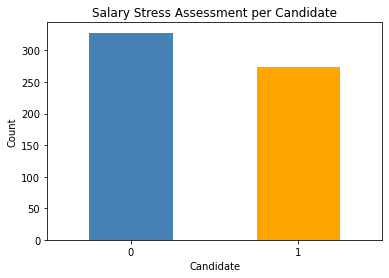

In [4]:
# The dependent variable is `candidate`
# Plot of count of stress per median salary
dmv.groupby('Candidate')['Salary_s'].sum().plot(kind = 'bar', color = ['steelblue', 'orange'])
plt.title('Salary Stress Assessment per Candidate')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

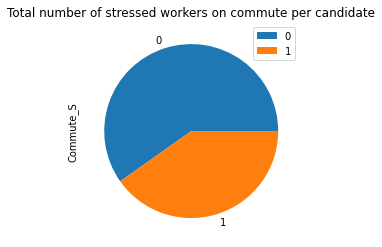

In [5]:
# Total number of employees on commute per candidate
dmv.groupby('Candidate')['Commute_S'].sum().plot(kind = 'pie', legend = True)
plt.title("Total number of stressed workers on commute per candidate")
plt.legend(loc = 'upper right')
plt.show()

In [6]:
# # Pivot the DataFrame to have 'Stress Level' as columns and 'Candidate' as rows
stress = dmv.groupby('Candidate')['Stress'].value_counts().to_frame().reset_index()
pivot_df = stress.pivot(index='Candidate', columns='Stress', values='count')
# Plot the bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.set_xlabel('Candidate')
ax.set_ylabel('Count')
ax.set_title('Count of Candidates for each Stress Level')
plt.xticks(rotation = 0)
plt.legend(title='Stress Level', labels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4'])
plt.show()

ValueError: cannot insert Stress, already exists

In [7]:
# Setting up the logistic regression
# Selecting the dependent and independent variables
y = dmv.Candidate
X = dmv.loc[:, ['Salary_s', 'Per_Crime_S', 'Prop_Crime_S', 'Commute_S']]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

In [8]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate Predictions on Test Set
y_pred = model.predict(X_test)
# Compute the predicted probabilities
proba = model.predict_proba(X_test)

# Compute the accuracy of the model on the test set
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy on test set: 100.00%


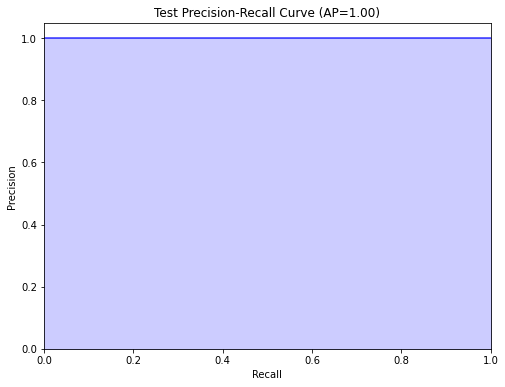

In [9]:
# Predict probabilities and labels on the test set
y_pred = model.predict(X_test)

# Calculate the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, proba[:, 1])
average_precision = average_precision_score(y_test, proba[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize = (8, 6))
plt.step(recall, precision, color='b', alpha = 0.8, where = 'post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

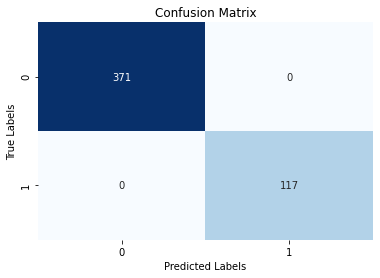

In [10]:
# Create and plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

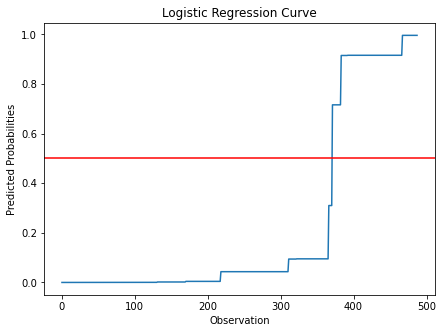

In [11]:
# Logistic regression curve.
plt.figure(figsize = (7, 5))
plt.plot(sorted(proba[:, 1]))
plt.axhline(0.5, color = 'red')
plt.title('Logistic Regression Curve')
plt.xlabel('Observation'), plt.ylabel('Predicted Probabilities')
plt.show()